# SALES PREDICTION IN A CINEMA THEATER USING LINEAR REGRESSION

This dataset consists of 11 columns namely: 

film_code','cinema_code','total_sales','tickets_sold','tickets_out','show_time','occu_perc','ticket_price','ticket_use','capacity','month'.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
sales_data = pd.read_csv('/content/drive/MyDrive/cinemaTicket_Ref_1.csv')
sales_data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328639,05-05-2018,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,05-05-2018,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,05-05-2018,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,05-05-2018,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,05-05-2018,5,2,5


In [ ]:
type(sales_data)

pandas.core.frame.DataFrame

In [ ]:
sales_data.shape

(1999, 14)

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   film_code     1999 non-null   int64  
 1   cinema_code   1999 non-null   int64  
 2   total_sales   1999 non-null   int64  
 3   tickets_sold  1999 non-null   int64  
 4   tickets_out   1999 non-null   int64  
 5   show_time     1999 non-null   int64  
 6   occu_perc     1999 non-null   float64
 7   ticket_price  1999 non-null   float64
 8   ticket_use    1999 non-null   int64  
 9   capacity      1999 non-null   float64
 10  date          1999 non-null   object 
 11  month         1999 non-null   int64  
 12  quarter       1999 non-null   int64  
 13  day           1999 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 218.8+ KB


In [ ]:
sales_data = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/cinemaTicket_Ref_1.csv"))
sales_data.drop(['date','quarter','day'], axis='columns',inplace=True)
sales_data.dropna()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month
0,1492,304,3900000,26,0,4,4.26,150000.00000,26,610.328639,5
1,1492,352,3360000,42,0,5,8.08,80000.00000,42,519.801980,5
2,1492,489,2560000,32,0,4,20.00,80000.00000,32,160.000000,5
3,1492,429,1200000,12,0,1,11.01,100000.00000,12,108.991826,5
4,1492,524,1200000,15,0,3,16.67,80000.00000,15,89.982004,5
...,...,...,...,...,...,...,...,...,...,...,...
1994,1497,467,1400000,28,0,2,3.50,50000.00000,28,800.000000,7
1995,1497,142,1200000,12,0,6,5.56,100000.00000,12,215.827338,7
1996,1497,489,1180000,21,0,3,17.50,56190.47619,21,120.000000,7
1997,1497,299,1150000,27,0,1,5.78,42592.59259,27,467.128028,7


In [ ]:
sales_data.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month
count,1999.000000,1999.000000,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.00000,1999.000000,1999.000000,1999.000000
mean,1504.263632,330.071036,3.978939e+06,38.554277,0.084542,3.032516,13.306458,88532.34813,38.469735,535.092907,6.303652
std,25.685614,161.163136,1.240141e+07,90.397321,0.758902,2.011091,17.644467,36843.07507,90.235195,675.642033,1.374857
min,1492.000000,34.000000,3.500000e+04,1.000000,0.000000,1.000000,0.040000,25000.00000,1.000000,10.000000,5.000000
25%,1492.000000,191.000000,5.500000e+05,7.000000,0.000000,2.000000,1.930000,60000.00000,7.000000,126.012601,5.000000
50%,1492.000000,344.000000,1.200000e+06,15.000000,0.000000,3.000000,6.100000,80000.00000,15.000000,312.024353,6.000000
75%,1497.000000,485.000000,3.000000e+06,35.000000,0.000000,3.500000,16.695000,120000.00000,35.000000,625.000000,7.000000
max,1567.000000,556.000000,2.364000e+08,1584.000000,25.000000,16.000000,100.000000,150000.00000,1574.000000,6250.000000,10.000000


In [ ]:
# Checking Null values
sales_data.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
month           0
dtype: int64

# Data before Normalisation

In [ ]:
X = sales_data[['ticket_price']]
Y = sales_data['show_time']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [ ]:
X_train

,ticket_price
979,150000.00000
1432,100000.00000
864,70000.00000
1087,80000.00000
1064,40000.00000
...,...
1879,80000.00000
1895,80000.00000
1859,93913.04348
792,34090.90909


In [ ]:
X_test

,ticket_price
1852,70000.00000
1760,35000.00000
268,40000.00000
1998,70000.00000
1396,83076.92308
...,...
709,40000.00000
1948,150000.00000
1851,50000.00000
1585,60000.00000


In [ ]:
Y_train

979     3
1432    3
864     3
1087    1
1064    2
       ..
1879    1
1895    4
1859    2
792     2
1544    3
Name: show_time, Length: 1599, dtype: int64

In [ ]:
Y_test

1852    1
1760    4
268     2
1998    4
1396    4
       ..
709     1
1948    3
1851    3
1585    2
1136    6
Name: show_time, Length: 400, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
predictions

array([2.95912022, 2.84858773, 2.86437809, 2.95912022, 3.00041807,
       2.92753951, 2.99070093, 2.8959588 , 2.92753951, 3.21176589,
       2.8959588 , 2.99070093, 2.95799233, 3.21176589, 3.11702377,
       2.92753951, 2.84858773, 2.92753951, 2.8959588 , 2.92753951,
       2.99070093, 3.21176589, 2.95912022, 3.21176589, 2.99070093,
       2.99070093, 2.87659327, 2.92753951, 2.99070093, 2.8959588 ,
       2.92753951, 3.20856966, 2.86437809, 2.92753951, 3.11702377,
       3.21176589, 2.99070093, 2.99070093, 3.04947614, 2.92753951,
       2.86437809, 3.21176589, 3.11702377, 2.92753951, 2.90810522,
       3.21005265, 2.91964433, 3.11702377, 3.21176589, 2.99070093,
       3.00964935, 3.05386235, 3.21176589, 2.92753951, 2.99070093,
       2.97666506, 3.11702377, 2.92753951, 2.8959588 , 2.99070093,
       3.21176589, 3.05386235, 2.99070093, 2.83279738, 2.95912022,
       2.99070093, 2.99070093, 2.86437809, 3.21176589, 2.92753951,
       2.99070093, 3.11702377, 2.8959588 , 2.99070093, 2.99070

In [ ]:
Y_test

1852    1
1760    4
268     2
1998    4
1396    4
       ..
709     1
1948    3
1851    3
1585    2
1136    6
Name: show_time, Length: 400, dtype: int64

In [ ]:
X.shape

(1999, 1)

In [ ]:
Y.shape

(1999,)

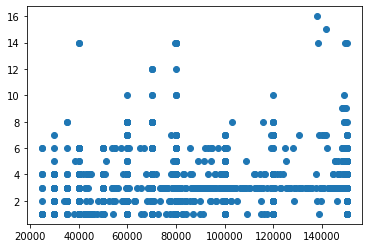

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

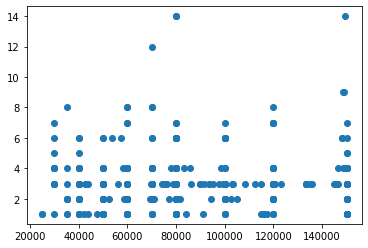

In [ ]:
plt.scatter(X_test,Y_test)

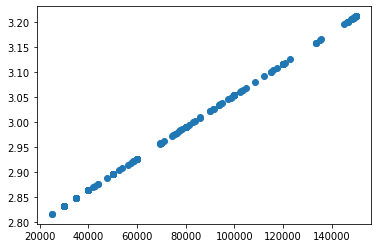

In [ ]:
plt.scatter(X_test,predictions)

In [ ]:
print(lm.intercept_)

2.7380552491763828


In [ ]:
print(lm.coef_)

[3.15807097e-06]


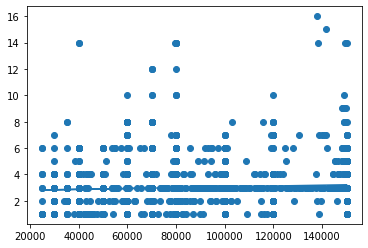

In [ ]:
yy=(lm.coef_)*X + (lm.intercept_)
round(yy,0)


plt.plot(X,yy)
plt.scatter(X,Y)

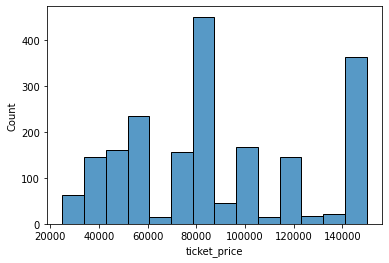

In [ ]:
sns.histplot(x="ticket_price",data=sales_data)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
Y_test

1852    1
1760    4
268     2
1998    4
1396    4
       ..
709     1
1948    3
1851    3
1585    2
1136    6
Name: show_time, Length: 400, dtype: int64

In [ ]:
predictions

array([2.95912022, 2.84858773, 2.86437809, 2.95912022, 3.00041807,
       2.92753951, 2.99070093, 2.8959588 , 2.92753951, 3.21176589,
       2.8959588 , 2.99070093, 2.95799233, 3.21176589, 3.11702377,
       2.92753951, 2.84858773, 2.92753951, 2.8959588 , 2.92753951,
       2.99070093, 3.21176589, 2.95912022, 3.21176589, 2.99070093,
       2.99070093, 2.87659327, 2.92753951, 2.99070093, 2.8959588 ,
       2.92753951, 3.20856966, 2.86437809, 2.92753951, 3.11702377,
       3.21176589, 2.99070093, 2.99070093, 3.04947614, 2.92753951,
       2.86437809, 3.21176589, 3.11702377, 2.92753951, 2.90810522,
       3.21005265, 2.91964433, 3.11702377, 3.21176589, 2.99070093,
       3.00964935, 3.05386235, 3.21176589, 2.92753951, 2.99070093,
       2.97666506, 3.11702377, 2.92753951, 2.8959588 , 2.99070093,
       3.21176589, 3.05386235, 2.99070093, 2.83279738, 2.95912022,
       2.99070093, 2.99070093, 2.86437809, 3.21176589, 2.92753951,
       2.99070093, 3.11702377, 2.8959588 , 2.99070093, 2.99070

In [ ]:
Y_test

1852    1
1760    4
268     2
1998    4
1396    4
       ..
709     1
1948    3
1851    3
1585    2
1136    6
Name: show_time, Length: 400, dtype: int64

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 1.2608670201257643
MSE: 3.77897487493472
RMSE: 1.9439585579262537


# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
sales_data[['film_code','cinema_code','total_sales','tickets_sold','tickets_out','show_time','occu_perc','ticket_price','ticket_use','capacity','month']]=sc.fit_transform(sales_data[['film_code','cinema_code','total_sales','tickets_sold','tickets_out','show_time','occu_perc','ticket_price','ticket_use','capacity','month']])
sales_data

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month
0,-0.477571,-0.161808,-0.006367,-0.138914,-0.111429,0.481194,-0.512836,1.668781,-0.138226,0.111382,-0.948446
1,-0.477571,0.136101,-0.049921,0.038127,-0.111429,0.978561,-0.296284,-0.231644,0.039133,-0.022637,-0.948446
2,-0.477571,0.986384,-0.114446,-0.072523,-0.111429,0.481194,0.379451,-0.231644,-0.071717,-0.555304,-0.948446
3,-0.477571,0.613997,-0.224139,-0.293824,-0.111429,-1.010906,-0.130184,0.311335,-0.293415,-0.630819,-0.948446
4,-0.477571,1.203610,-0.224139,-0.260629,-0.111429,-0.016173,0.190676,-0.231644,-0.260160,-0.658962,-0.948446
...,...,...,...,...,...,...,...,...,...,...,...
1994,-0.282861,0.849842,-0.208007,-0.116784,-0.111429,-0.513539,-0.555920,-1.046112,-0.116056,0.392180,0.506614
1995,-0.282861,-1.167253,-0.224139,-0.293824,-0.111429,1.475928,-0.439140,0.311335,-0.293415,-0.472655,0.506614
1996,-0.282861,0.986384,-0.225752,-0.194239,-0.111429,-0.016173,0.237728,-0.878047,-0.193651,-0.614522,0.506614
1997,-0.282861,-0.192841,-0.228171,-0.127849,-0.111429,-1.010906,-0.426669,-1.247215,-0.127141,-0.100618,0.506614


In [ ]:
from sklearn import preprocessing
normalization=preprocessing.normalize(sales_data.iloc[:],axis=0)
data1=pd.DataFrame(normalization)
data1

,0,1,2,3,4,5,6,7,8,9,10
0,-0.010681,-0.003619,-0.000142,-0.003107,-0.002492,0.010763,-0.011470,0.037324,-0.003092,0.002491,-0.021213
1,-0.010681,0.003044,-0.001117,0.000853,-0.002492,0.021887,-0.006627,-0.005181,0.000875,-0.000506,-0.021213
2,-0.010681,0.022062,-0.002560,-0.001622,-0.002492,0.010763,0.008487,-0.005181,-0.001604,-0.012420,-0.021213
3,-0.010681,0.013733,-0.005013,-0.006572,-0.002492,-0.022610,-0.002912,0.006963,-0.006563,-0.014109,-0.021213
4,-0.010681,0.026920,-0.005013,-0.005829,-0.002492,-0.000362,0.004265,-0.005181,-0.005819,-0.014739,-0.021213
...,...,...,...,...,...,...,...,...,...,...,...
1994,-0.006327,0.019008,-0.004652,-0.002612,-0.002492,-0.011486,-0.012434,-0.023398,-0.002596,0.008772,0.011331
1995,-0.006327,-0.026107,-0.005013,-0.006572,-0.002492,0.033011,-0.009822,0.006963,-0.006563,-0.010572,0.011331
1996,-0.006327,0.022062,-0.005049,-0.004344,-0.002492,-0.000362,0.005317,-0.019639,-0.004331,-0.013745,0.011331
1997,-0.006327,-0.004313,-0.005103,-0.002859,-0.002492,-0.022610,-0.009543,-0.027896,-0.002844,-0.002250,0.011331


In [ ]:
x=data1[[0,1,2,3,4,5,6]]
y=data1[[7]]

# Data after Normalisation

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4,random_state=100)

In [ ]:
x_train

,0,1,2,3,4,5,6
66,-0.010681,0.001934,-0.002037,-0.004839,-0.002492,-0.000362,-0.012561
932,-0.010681,0.022062,-0.006096,-0.008552,-0.002492,0.010763,-0.013854
1536,-0.006327,0.026087,-0.001874,-0.000385,-0.002492,-0.000362,0.006014
901,-0.010681,-0.016668,-0.003498,0.003080,-0.002492,-0.000362,0.072936
636,-0.010681,0.028031,-0.006673,-0.008552,-0.002492,-0.011486,-0.016022
...,...,...,...,...,...,...,...
1879,-0.006327,-0.022914,-0.006601,-0.008552,-0.002492,-0.022610,-0.008415
1895,-0.006327,0.026920,0.006244,0.013474,-0.002492,0.010763,0.081393
1859,-0.006327,-0.023192,0.000615,0.001843,-0.002492,-0.011486,0.066444
792,-0.010681,0.021645,-0.006501,-0.006819,-0.002492,-0.011486,-0.014386


In [ ]:
x_test

,0,1,2,3,4,5,6
1852,-0.006327,0.027476,-0.006294,-0.007809,-0.002492,-0.022610,-0.014513
1760,-0.006327,0.022201,-0.005915,-0.004592,-0.002492,0.010763,-0.015604
268,-0.010681,-0.017917,-0.004436,-0.000137,-0.002492,-0.011486,-0.009277
1998,-0.006327,0.022201,-0.005157,-0.005582,-0.002492,0.010763,-0.015857
1396,-0.006327,0.026087,-0.003281,-0.003107,-0.002492,0.010763,-0.007349
...,...,...,...,...,...,...,...
221,-0.010681,-0.005424,-0.006204,-0.007314,-0.002492,-0.000362,-0.014640
1382,-0.006327,-0.016668,0.012594,0.024364,-0.002492,-0.000362,-0.002785
1884,-0.006327,0.005265,-0.006727,-0.008304,-0.002492,-0.011486,-0.016009
747,-0.010681,0.026087,-0.004905,-0.004344,-0.002492,-0.022610,0.031538


In [ ]:
y_train

,7
66,0.037324
932,0.037324
1536,-0.005509
901,-0.029470
636,-0.011253
...,...
1879,-0.005181
1895,-0.005181
1859,0.003267
792,-0.033058


In [ ]:
y_test

,7
1852,-0.011253
1760,-0.032506
268,-0.029470
1998,-0.011253
1396,-0.003313
...,...
221,-0.017325
1382,-0.005181
1884,-0.023398
747,-0.017325


In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,normalize=False)

LinearRegression(normalize=False)

In [ ]:
predictions=lm.predict(x_test)

In [ ]:
predictions

array([[ 9.45859628e-04],
       [-2.89731001e-03],
       [-1.30847884e-02],
       [ 1.97689887e-04],
       [ 1.23081421e-03],
       [-3.22089828e-03],
       [ 8.87964891e-03],
       [-1.01869390e-02],
       [ 2.64167382e-04],
       [ 8.71320369e-03],
       [-4.37264287e-03],
       [-5.20692070e-04],
       [-7.46766062e-03],
       [ 1.15656602e-02],
       [ 3.81419173e-03],
       [-6.64618414e-03],
       [-5.51611794e-03],
       [-2.19639002e-03],
       [-6.38806854e-03],
       [ 1.91798566e-03],
       [-2.34937384e-03],
       [ 2.81951682e-03],
       [-3.41118748e-03],
       [ 1.95593097e-02],
       [ 1.08400062e-02],
       [ 6.18521046e-03],
       [-9.47621157e-03],
       [-1.45886352e-03],
       [-1.82119093e-02],
       [ 3.21514444e-04],
       [ 1.91394175e-03],
       [ 1.10518668e-01],
       [-3.30403080e-03],
       [-4.98389435e-04],
       [ 1.08126726e-02],
       [ 1.78383966e-03],
       [-1.88686743e-02],
       [-4.19362602e-03],
       [-1.1

# Values after normalisation

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.016538666843109975
MSE: 0.00042245589312591244
RMSE: 0.020553731853994603
